## 1. Import libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pickle
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## 2. Data collection

In [3]:
# define url
url = 'https://en.wikipedia.org/wiki/Passengers_of_the_Titanic'
response = requests.get(url)

# define the attributes for data
Name = []
Age = []
Hometown = []
Boarded = []
Destination = []
Lifeboat = []
Class = []
Survive = []
Country = []

# check if the url is ok or not
if (response.status_code != 200):
    print('Error')
else:
    url_data = response.text
    soup = BeautifulSoup(url_data, 'html.parser')

    # find tags data
    passenger_tags = soup.find_all('table', {'class':'wikitable sortable'})
    clss = 0
    span_cnt = np.full(7, 0, dtype = int)
    # each passenger_tag is passengers with each class
    for passenger_tag in passenger_tags:
        tr_tags = passenger_tag.find_all('tr')
        
        clss += 1
        check = np.full(7, True, dtype = bool)
        cnt = 0
        for tr_tag in tr_tags:
            # each tr_tag is a passenger data
            td_tags = tr_tag.find_all('td')
            
            if not td_tags:
                continue

            if tr_tag.get('style'):
                Survive.append(1)
            else:
                Survive.append(0)

            # each td_tag is a passenger attributes
            i = 0
            cnt += 1
            for td_tag in td_tags:
                
                row = int(td_tag.get('rowspan')) if td_tag.get('rowspan') else 1

                while i < 7 and check[i] == False:
                    span_cnt[i] -= 1
                    if span_cnt[i] == 0:
                        check[i] = True
                    i += 1

                
                if i >= 7:
                    break
                
                if check[i] == True:
                    span_cnt[i] += row-1
                    if span_cnt[i] > 0:
                        check[i] = False

                    if clss <= 2:
                        if i == 0:
                            Class.append(clss)
                            Country.append(np.nan)
                            while row > 0:
                                Name.append(td_tag.text) if td_tag else Name.append(np.nan)
                                row -= 1
                        elif i == 1:
                            while row > 0:
                                Age.append(td_tag.text) if td_tag else Age.append(np.nan)
                                row -= 1
                        elif i == 2:
                            while row > 0:
                                Hometown.append(td_tag.text) if td_tag else Hometown.append(np.nan)
                                row -= 1
                        elif i == 3:
                            while row > 0:
                                Boarded.append(td_tag.text) if td_tag else Boarded.append(np.nan)
                                row -= 1
                        elif i == 4:
                            while row > 0:
                                Destination.append(td_tag.text) if td_tag else Destination.append(np.nan)
                                row -= 1      
                        elif i == 5:
                            while row > 0:
                                Lifeboat.append(td_tag.text) if td_tag else Lifeboat.append(np.nan)
                                row -= 1
                    else:
                        if i == 0:
                            Class.append(clss)
                            while row > 0:
                                Name.append(td_tag.text) if td_tag else Name.append(np.nan)
                                row -= 1
                        elif i == 1:
                            while row > 0:
                                Age.append(td_tag.text) if td_tag else Age.append(np.nan)
                                row -= 1
                        elif i == 2:
                            while row > 0:
                                Hometown.append(td_tag.text) if td_tag else Hometown.append(np.nan)
                                row -= 1
                        elif i == 3:
                            while row > 0:
                                Country.append(td_tag.text) if td_tag else Country.append(np.nan)
                                row -= 1
                        elif i == 4:
                            while row > 0:
                                Boarded.append(td_tag.text) if td_tag else Boarded.append(np.nan)
                                row -= 1
                        elif i == 5:
                            while row > 0:
                                Destination.append(td_tag.text) if td_tag else Destination.append(np.nan)
                                row -= 1      
                        elif i == 6:
                            while row > 0:
                                Lifeboat.append(td_tag.text) if td_tag else Lifeboat.append(np.nan)
                                row -= 1
                    i+=1
            
            while i < 7 and check[i] == False:
                    span_cnt[i] -= 1
                    if span_cnt[i] == 0:
                        check[i] = True
                    i += 1

raw_df = pd.DataFrame({'Name':Name,
                       'Age': Age,
                       'Hometown': Hometown,
                       'Country': Country,
                       'Boarded': Boarded,
                       'Destination': Destination,
                       'Lifeboat': Lifeboat,
                       'Class': Class,
                       'Survive': Survive})

# export raw data as raw_data.csv
raw_df.to_csv('./data/raw_data.csv', index = False)

## 3. Data cleaning

In [4]:
# read data
df = pd.read_csv('./data/raw_data.csv')

# make a deep copy of df_val
df_cp = pickle.loads(pickle.dumps(df))
df_cp.head()

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",NaN,Southampton,St Louis,\n,1,1
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",NaN,Southampton,"Montreal, Quebec, Canada",NaN,1,0
2,"and chauffeur, Mr. George Swane[71]",19,NaN,NaN,Southampton,"Montreal, Quebec, Canada",NaN,1,0
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",NaN,Southampton,"Montreal, Quebec, Canada",11,1,1
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",NaN,Southampton,"Montreal, Quebec, Canada",NaN,1,0


Let's get to know our data:

* **Name**: the name of the passenger.
* **Age**: the age of the passenger.
* **Hometown**: the hometown of the passenger.
* **Country**: the country where the passenger from.
* **Boarded**: the place where passenger get on the ship.
* **Destination**: the place where passenger want to go.
* **Lifeboat**: the lifeboat that the passenger get on.
* **Class**: the class of the passenger.
* **Survive**: whether they survive or not.

In [5]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1312 non-null   object
 1   Age          1312 non-null   object
 2   Hometown     1311 non-null   object
 3   Country      708 non-null    object
 4   Boarded      1309 non-null   object
 5   Destination  1311 non-null   object
 6   Lifeboat     510 non-null    object
 7   Class        1312 non-null   int64 
 8   Survive      1312 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 92.4+ KB


As we can see, there are missing values in **'Hometown'**, **'Country'**, **'Boarded'**, **'Destination'** and **'Lifeboat'** columns. And **'Age'** must be integers type instead of object. So we might change it into integers.

In [6]:
df_cp['Age'] = pd.to_numeric(df_cp['Age'], errors = 'coerce').astype('Int64')
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1312 non-null   object
 1   Age          1300 non-null   Int64 
 2   Hometown     1311 non-null   object
 3   Country      708 non-null    object
 4   Boarded      1309 non-null   object
 5   Destination  1311 non-null   object
 6   Lifeboat     510 non-null    object
 7   Class        1312 non-null   int64 
 8   Survive      1312 non-null   int64 
dtypes: Int64(1), int64(2), object(6)
memory usage: 93.7+ KB


After converting to type integers, there are 12 missing values because these values cannot be converted into integers properly. There are only *12/1312 = 0.91%* in the data, so we can eliminate those **NULL values** by dropping rows contain **NULL values**.

In [7]:
df_cp.dropna(subset = ['Age'], inplace = True)
df_cp.isnull().sum()

Name             0
Age              0
Hometown         1
Country        600
Boarded          3
Destination      1
Lifeboat       798
Class            0
Survive          0
dtype: int64

**'Lifeboat'** have 798 missing values, but for lifeboat we might only consider that the passenger is on a lifeboat or not. The number or letter that signed on the lifeboat is not so important. So the missing values mean that the passengers do not have lifeboat. We will convert the values of **'Lifeboat'** columns to **0** and **1**.
* **1**: had lifeboat.
* **0**: did not have lifeboat.

In [8]:
df_cp.loc[df_cp['Lifeboat'].notna(), 'Lifeboat'] = 1
df_cp['Lifeboat'] = df_cp['Lifeboat'].fillna(0)
df_cp['Lifeboat'] = df_cp['Lifeboat'].astype('Int64')
df_cp.isnull().sum()

Name             0
Age              0
Hometown         1
Country        600
Boarded          3
Destination      1
Lifeboat         0
Class            0
Survive          0
dtype: int64

Just like the previous column, there are only 5 missing values so we could eliminate them easily by dropping these rows.

In [9]:
df_cp.dropna(subset = ['Hometown', 'Boarded', 'Destination'], inplace = True)
df_cp.isnull().sum()

Name             0
Age              0
Hometown         0
Country        596
Boarded          0
Destination      0
Lifeboat         0
Class            0
Survive          0
dtype: int64

For **'Country'** column, the missing values appeared because of the differences between data between class 1, 2 and class 3. So we can just identify their country in the **'Hometown'** column of passengers in class 1 and 2.

In [10]:
def find_country(hometown):
    res = ''
    for i in range(len(hometown)-1, -1, -1):
        if hometown[i] == ',':
            res = hometown[i+2:-8]
            break
    return res

condition = (df_cp['Class'].isin([1, 2])) & (df_cp['Hometown'].str[-1] == ']')

df_cp.loc[condition, 'Country'] = df_cp.loc[condition,'Hometown'].apply(find_country)
df_cp[condition]

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive
79,"Colley, Mr. Edward Pomeroy",37,"Dublin, Ireland, UK[note 2]",UK,Southampton,"Vancouver, British Columbia, Canada",0,1,0
217,"Nourney, Mr. Alfred[83][84]",20,"Cologne, German Empire[note 3]",German Empire,Cherbourg,New York City,1,1,1
341,"Becker, Mrs. Nellie E. (née Baumgardner)",35,"Guntur, Madras Province, British India[note 4]",British India,Southampton,"Benton Harbor, Michigan, US",1,2,1
342,"Becker, Miss Ruth Elizabeth",12,"Guntur, Madras Province, British India[note 4]",British India,Southampton,"Benton Harbor, Michigan, US",1,2,1
343,"Becker, Miss Marion Louise",4,"Guntur, Madras Province, British India[note 4]",British India,Southampton,"Benton Harbor, Michigan, US",1,2,1
344,"Becker, Master Richard Frederick",1,"Guntur, Madras Province, British India[note 4]",British India,Southampton,"Benton Harbor, Michigan, US",1,2,1
354,"Brown, Mr. Thomas William Solomon",60,"Cape Town, South Africa, UK[note 5]",UK,Southampton,"Seattle, Washington, US\n",0,2,0
363,"Caldwell, Mr. Albert Francis",26,"Bangkok, Siam[note 6]",Siam,Southampton,"Roseville, Illinois, US",1,2,1
364,"Caldwell, Mrs. Sylvia Mae (née Harbaugh)",28,"Bangkok, Siam[note 6]",Siam,Southampton,"Roseville, Illinois, US",1,2,1
380,"Collander, Mr. Erik Gustaf",27,"Helsinki, Grand Duchy of Finland[note 7]",Grand Duchy of Finland,Southampton,"Ashtabula, Ohio, US\n",0,2,0


In [11]:
df_cp.isnull().sum()

Name             0
Age              0
Hometown         0
Country        573
Boarded          0
Destination      0
Lifeboat         0
Class            0
Survive          0
dtype: int64

We have handle the special cases in **'Hometown'** column, now let's take on the easy one!

In [12]:
def find_country1(hometown):
    res = ''
    for i in range(len(hometown)-1, -1, -1):
        if hometown[i] == ',':
            res = hometown[i+2:]
            break
    return res

condition1 = (df_cp['Class'].isin([1, 2])) & (df_cp['Hometown'].str[-1] != ']')
df_cp.loc[condition1, 'Country'] = df_cp.loc[condition1, 'Hometown'].apply(find_country1)
df_cp[condition1]

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",US,Southampton,St Louis,1,1,1
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",UK,Southampton,"Montreal, Quebec, Canada",1,1,1
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0
5,"and maid, Miss Sarah Daniels",33,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",1,1,1
...,...,...,...,...,...,...,...,...,...
599,"Wilkinson, Miss Elizabeth Anne (alias Mrs. Eli...",29,"Manchester, England",England,Southampton,"Philadelphia, Pennsylvania, US",1,2,1
600,"Williams, Mr. Charles Eugene",23,"Harrow, London, England",England,Southampton,"Chicago, Illinois, US",1,2,1
601,"Woodward, Mr. John Wesley[72]",32,"Oxford, Oxfordshire, England",England,Southampton,New York City,0,2,0
602,"Wright, Miss Marion",26,"Yeovil, Somerset, England",England,Southampton,"Cottage Grove, Oregon, US",1,2,1


In [13]:
df_cp.isnull().sum()

Name           0
Age            0
Hometown       0
Country        0
Boarded        0
Destination    0
Lifeboat       0
Class          0
Survive        0
dtype: int64

Now there are no NULL values in the data.

In [14]:
df_cp.describe()

,Age,Lifeboat,Class,Survive
count,1295.0,1295.0,1295.000000,1295.000000
mean,29.648649,0.386873,2.289575,0.379151
std,13.542626,0.487222,0.840627,0.485363
min,1.0,0.0,1.000000,0.000000
25%,21.0,0.0,1.500000,0.000000
50%,28.0,0.0,3.000000,0.000000
75%,37.5,1.0,3.000000,1.000000
max,74.0,1.0,3.000000,1.000000


We check all the numeric value columns so that if they have outliers. But in this situation, there might not be any outliers in these columns.

So let's take a look on these columns to check if we could do some feature engineerings.

At the **'Name'** column, we can see that the title **'Miss'**, **'Mr'**, **'Master'**, ... may be at **'Master'** level, they might have a higher a chance of surviving. So we will create a new columns called **'Title'** to contain these values.

In [15]:
Title = []
for name in df_cp['Name']:
    check = True
    for i in range(len(name)-1, -1, -1):
        if name[i] == ',':
            title_val = name[i+2:]
            Title.append(title_val.split(' ')[0].split('.')[0])
            check = False
            break

    if check == True:
        Title.append(np.nan)

df_cp['Title'] = Title
df_cp.head()

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive,Title
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",US,Southampton,St Louis,1,1,1,Miss
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mr
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",UK,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mrs
5,"and maid, Miss Sarah Daniels",33,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss


In [16]:
df_cp['Title'].isnull().sum()

1

After taking **'Title'** values from **'Name'**, there is one missing value. Let's find out why it is **NULL**.

In [17]:
df_cp[df_cp['Title'].isnull()]['Name']

339    Beane. Mrs. Ethel (née Clarke)
Name: Name, dtype: object

There is **'.'** instead of **','** in the value, this make my algorithm to find the title above wrong, so just do some simple code to convert it into title.

In [18]:
df_cp.loc[df_cp['Title'].isnull(), 'Title'] = 'Mrs'

Let's check on the number of unique values in the **'Value'** column inorder to fix error values in data and fix it by simple assigning code.

In [19]:
df_cp['Country'].value_counts()

Country
England                   259
US                        222
Ireland                   118
Sweden                    104
                           75
Syria                      69
UK                         66
Finland                    52
Canada                     39
Bulgaria                   31
France                     31
Croatia                    30
Norway                     27
Belgium                    22
Switzerland                17
Channel Islands            11
China                       9
Spain                       8
Scotland                    7
Denmark                     7
Wales                       6
Turkey                      6
Argentina                   5
Slovenia                    5
Grand Duchy of Finland      4
Bosnia                      4
Russia                      4
Greece                      4
British India               4
Portugal                    4
Syria[95]                   3
German Empire               3
Uruguay                     3
Ot

In [20]:
df_cp.loc[df_cp['Country'] == 'Syria[95]', 'Country'] = 'Syria' 
df_cp.loc[df_cp['Country'] == 'Russia(Estonia?)', 'Country'] = 'Russia'
df_cp.loc[df_cp['Country'] == 'France\n', 'Country'] = 'France'
df_cp.loc[df_cp['Country'] == 'UK\n', 'Country'] = 'UK'
df_cp.loc[df_cp['Country'] == 'Syria\n', 'Country'] = 'Syria'
df_cp.loc[df_cp['Country'] == 'Egypt\n', 'Country'] = 'Egypt'
df_cp.loc[df_cp['Country'] == 'Monaco\n', 'Country'] = 'Monaco'
df_cp.loc[df_cp['Country'] == 'England\n', 'Country'] = 'England'
df_cp['Country'].value_counts()

Country
England                   260
US                        222
Ireland                   118
Sweden                    104
                           75
Syria                      73
UK                         67
Finland                    52
Canada                     39
France                     32
Bulgaria                   31
Croatia                    30
Norway                     27
Belgium                    22
Switzerland                17
Channel Islands            11
China                       9
Spain                       8
Denmark                     7
Scotland                    7
Turkey                      6
Wales                       6
Slovenia                    5
Argentina                   5
Russia                      5
British India               4
Portugal                    4
Grand Duchy of Finland      4
Greece                      4
Bosnia                      4
Uruguay                     3
German Empire               3
Unknown                     2
So

In [21]:
df_cp.loc[((df_cp['Country'] == '') & (df_cp['Hometown'] == 'New York City'))]

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive,Title
9,"Anderson, Mr. Harry",47,New York City,,Southampton,New York City,1,1,1,Mr
12,"Appleton, Mrs. Charlotte Lane (née Lamson)",53,New York City,,Southampton,New York City,1,1,1,Mrs
14,"Astor, Colonel John Jacob IV",47,New York City,,Cherbourg,New York City,0,1,0,Colonel
15,"Astor, Mrs. Madeleine Talmage (née Force)[73][74]",18,New York City,,Cherbourg,New York City,1,1,1,Mrs
16,"and maid, Miss Rosalie Bidois",46,New York City,,Cherbourg,New York City,1,1,1,Miss
...,...,...,...,...,...,...,...,...,...,...
338,"Beane, Mr. Edward",32,New York City,,Southampton,New York City,1,2,1,Mr
362,"Byström, Miss Karolina",42,New York City,,Southampton,New York City,1,2,1,Miss
468,"Jerwan, Mrs. Marie Marthe (née Thuillard)",23,New York City,,Southampton,New York City,1,2,1,Mrs
541,"Pulbaum, Mr. Franz",27,New York City,,Southampton,New York City,0,2,0,Mr


In [22]:
df_cp.loc[((df_cp['Country'] == '') & (df_cp['Hometown'] != 'New York City'))]

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive,Title
147,"Harper, Mrs. Myra Raymond (née Haxtun)",49,New York City\n,,Cherbourg,New York City,1,1,1,Mrs
326,"Abelson, Mr. Samuel",30,Russia,,Cherbourg,"New York, New York, US",0,2,0,Mr
327,"Abelson, Mrs. Anna (née Wizosky?)",28,Russia,,Cherbourg,"New York, New York, US",1,2,1,Mrs


In [23]:
df_cp.loc[((df_cp['Country'] == '') & (df_cp['Hometown'] == 'New York City')), 'Country'] = 'US'
df_cp.loc[((df_cp['Country'] == '') & (df_cp['Hometown'] == 'New York City\n')), 'Country'] = 'US'
df_cp.loc[((df_cp['Country'] == '') & (df_cp['Hometown'] == 'Russia')), 'Country'] = 'Russia'
df_cp.loc[((df_cp['Country'] == '') & (df_cp['Hometown'] == 'Russia')), 'Country'] = 'Russia'

In [24]:
df_cp['Country'].value_counts()

Country
US                        295
England                   260
Ireland                   118
Sweden                    104
Syria                      73
UK                         67
Finland                    52
Canada                     39
France                     32
Bulgaria                   31
Croatia                    30
Norway                     27
Belgium                    22
Switzerland                17
Channel Islands            11
China                       9
Spain                       8
Scotland                    7
Denmark                     7
Russia                      7
Wales                       6
Turkey                      6
Argentina                   5
Slovenia                    5
Portugal                    4
Greece                      4
British India               4
Bosnia                      4
Grand Duchy of Finland      4
Uruguay                     3
German Empire               3
South Africa                2
Ottoman Empire              2
Un

Because **'UK'** is made up of **'England'**, **'Scotland'**, **'Wales'** and **'Northern Ireland**. So we are going to put all of these countries as **'UK'**.

In [25]:
df_cp.loc[df_cp['Country'].isin(['England', 'Scotland', 'Wales', 'Ireland', 'England UK']), 'Country'] = 'UK'

In [26]:
df_cp['Country'].value_counts()

Country
UK                        460
US                        295
Sweden                    104
Syria                      73
Finland                    52
Canada                     39
France                     32
Bulgaria                   31
Croatia                    30
Norway                     27
Belgium                    22
Switzerland                17
Channel Islands            11
China                       9
Spain                       8
Russia                      7
Denmark                     7
Turkey                      6
Argentina                   5
Slovenia                    5
Greece                      4
Bosnia                      4
Portugal                    4
Grand Duchy of Finland      4
British India               4
Uruguay                     3
German Empire               3
Ottoman Empire              2
Unknown                     2
South Africa                2
Germany                     2
Australia                   2
Russian Empire              2
It

In [27]:
df_cp['Country'].value_counts()/len(df_cp)

Country
UK                        0.355212
US                        0.227799
Sweden                    0.080309
Syria                     0.056371
Finland                   0.040154
Canada                    0.030116
France                    0.024710
Bulgaria                  0.023938
Croatia                   0.023166
Norway                    0.020849
Belgium                   0.016988
Switzerland               0.013127
Channel Islands           0.008494
China                     0.006950
Spain                     0.006178
Russia                    0.005405
Denmark                   0.005405
Turkey                    0.004633
Argentina                 0.003861
Slovenia                  0.003861
Greece                    0.003089
Bosnia                    0.003089
Portugal                  0.003089
Grand Duchy of Finland    0.003089
British India             0.003089
Uruguay                   0.002317
German Empire             0.002317
Ottoman Empire            0.001544
Unknown     

In [28]:
df_cp['CountryBin'] = np.where(~df_cp['Country'].isin(['UK', 'US', 'Sweden', 'Syria']), 'Other', df_cp['Country'])
df_cp['CountryBin'].value_counts()

CountryBin
UK        460
Other     363
US        295
Sweden    104
Syria      73
Name: count, dtype: int64

Let's take a look on **'Title'** column.

In [29]:
df_cp['Title'].value_counts()

Title
Mr          753
Miss        263
Mrs         194
Master       53
Dr            8
Colonel       5
Father        4
Reverend      3
Major         2
The           2
Captain       1
Jr            1
Lady          1
Countess      1
Sr            1
Doña          1
Don           1
Sir           1
Name: count, dtype: int64

In [30]:
df_cp.loc[df_cp['Title'].isin(['Lady', 'Countess', 'Dona', 'Doña', 'Don']), 'Title'] = 'Mrs'

In [31]:
df_cp.loc[df_cp['Title'] == 'The', 'Title'] = 'Reverend'

In [32]:
df_cp.loc[df_cp['Title'] == 'Jr', 'Title'] = 'Master'

In [33]:
df_cp.loc[df_cp['Title'].isin(['Father', 'Sir', 'Sr']), 'Title'] = 'Mr'

In [34]:
df_cp['Title'].value_counts()

Title
Mr          759
Miss        263
Mrs         198
Master       54
Dr            8
Colonel       5
Reverend      5
Major         2
Captain       1
Name: count, dtype: int64

In [35]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 0 to 1311
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1295 non-null   object
 1   Age          1295 non-null   Int64 
 2   Hometown     1295 non-null   object
 3   Country      1295 non-null   object
 4   Boarded      1295 non-null   object
 5   Destination  1295 non-null   object
 6   Lifeboat     1295 non-null   Int64 
 7   Class        1295 non-null   int64 
 8   Survive      1295 non-null   int64 
 9   Title        1295 non-null   object
 10  CountryBin   1295 non-null   object
dtypes: Int64(2), int64(2), object(7)
memory usage: 123.9+ KB


For more information, we can create a *Binned* column based on **'Age'** called **'AgeBin'** to represent age ranges of the passengers. This is how we gonna binn the **'Age'** column.

* 1-18: minors.
* 19-30: young adults.
* 31-50: adults.
* 51-74: seniors.

In [36]:
df_cp['AgeBin'] = pd.cut(df_cp['Age'], bins = [0, 18, 30, 50, 74], labels = ['minors', 'young adults', 'adults', 'seniors'])
df_cp.head(10)

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive,Title,CountryBin,AgeBin
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",US,Southampton,St Louis,1,1,1,Miss,US,young adults
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mr,Other,young adults
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",UK,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss,UK,minors
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mrs,Other,young adults
5,"and maid, Miss Sarah Daniels",33,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss,Other,adults
6,"Allison, Miss Helen Loraine",2,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Miss,Other,minors
8,"and nurse, Miss Alice Catherine Cleaver",22,"London, England, UK\n",UK,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss,UK,young adults
9,"Anderson, Mr. Harry",47,New York City,US,Southampton,New York City,1,1,1,Mr,US,adults
10,"Andrews, Miss Kornelia Theodosia",62,"Hudson, New York, US",US,Cherbourg,"Hudson, New York, US",1,1,1,Miss,US,seniors
11,"Andrews, Mr. Thomas[72]",39,"Belfast, Ireland, UK",UK,Belfast,New York City,0,1,0,Mr,UK,adults


We could create 2 more columns called **'FamilySize'** and **'isAlone'**.

* **'FamilySize'**: shows the number of passengers he/she go with (including he/she).
* **'isAlone'**: show that he/she go alone or not. This columns contain **'1'** and **'0'** (1 stand for True, 0 stand for False).

In [37]:
FamilySize = []
i = 0
j = 0
cnt = 0
while (i < len(df_cp)):
    lastname1 = df_cp['Name'].iloc[i].split(' ')[0].split(',')[0]
    if j < len(df_cp):
        lastname2 = df_cp['Name'].iloc[j].split(' ')[0].split(',')[0]
    else:
        append_cnt = (j-1)-i+1
        while append_cnt > 0:
            FamilySize.append(cnt)
            append_cnt-=1
        break
        
    if (lastname1 == lastname2) or (lastname2 == 'and'):
        cnt+= 1
        j+=1
    else:
        append_cnt = (j-1)-i+1
        while append_cnt > 0:
            FamilySize.append(cnt)
            append_cnt-=1
        cnt = 0
        i = j
df_cp['FamilySize'] = FamilySize
df_cp['isAlone'] = 1
df_cp.loc[df_cp['FamilySize'] > 1, 'isAlone'] = 0
df_cp.head()

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive,Title,CountryBin,AgeBin,FamilySize,isAlone
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",US,Southampton,St Louis,1,1,1,Miss,US,young adults,1,1
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mr,Other,young adults,6,0
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",UK,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss,UK,minors,6,0
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mrs,Other,young adults,6,0
5,"and maid, Miss Sarah Daniels",33,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss,Other,adults,6,0


After doing some **feature engineering**, it is time for us to convert **categorial data** into **numerical data**.

In [38]:
ord_enc = OrdinalEncoder()
df_cp['AgeBin_Code'] = ord_enc.fit_transform(df_cp[['AgeBin']])
df_cp['CountryBin_Code'] = ord_enc.fit_transform(df_cp[['CountryBin']])
df_cp['Title_Code'] = ord_enc.fit_transform(df_cp[['Title']])
df_cp.head()

,Name,Age,Hometown,Country,Boarded,Destination,Lifeboat,Class,Survive,Title,CountryBin,AgeBin,FamilySize,isAlone,AgeBin_Code,CountryBin_Code,Title_Code
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",US,Southampton,St Louis,1,1,1,Miss,US,young adults,1,1,3.0,4.0,5.0
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mr,Other,young adults,6,0,3.0,0.0,6.0
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",UK,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss,UK,minors,6,0,1.0,3.0,5.0
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",0,1,0,Mrs,Other,young adults,6,0,3.0,0.0,7.0
5,"and maid, Miss Sarah Daniels",33,"Montreal, Quebec, Canada",Canada,Southampton,"Montreal, Quebec, Canada",1,1,1,Miss,Other,adults,6,0,0.0,0.0,5.0


In [39]:
df_cp.isnull().sum()

Name               0
Age                0
Hometown           0
Country            0
Boarded            0
Destination        0
Lifeboat           0
Class              0
Survive            0
Title              0
CountryBin         0
AgeBin             0
FamilySize         0
isAlone            0
AgeBin_Code        0
CountryBin_Code    0
Title_Code         0
dtype: int64

In [40]:
df_cp.to_csv('./data/cleaned_data.csv', index = False)

Let's split the data into **training**, **validating** and **testing** set.

In [41]:
Input = ['AgeBin_Code', 'CountryBin_Code', 'Title_Code', 'FamilySize', 'isAlone', 'Lifeboat', 'Class']
Target = ['Survive']
X_train, X_temp, y_train, y_temp = train_test_split(df_cp[Input], df_cp[Target], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## 4. Exploratory data analysis

In [57]:
df_data = pd.read_csv('./data/cleaned_data.csv')
df_data.shape

(1295, 17)

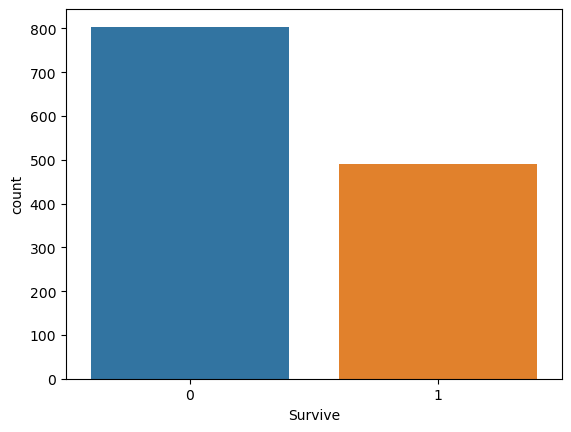

In [58]:
sns.countplot(df_data, x= "Survive")
plt.show()

From the above graph it is clear that not many persons survived. Out of 1295 persons in dataset only 491, 37,9% of total dataset survived. We will get more insight of data by exploring more.

In [59]:
df_data.groupby(['Title', 'Survive'])['Survive'].count()

Title     Survive
Captain   0            1
Colonel   0            3
          1            2
Dr        0            4
          1            4
Major     0            1
          1            1
Master    0           28
          1           26
Miss      0           83
          1          180
Mr        0          635
          1          124
Mrs       0           44
          1          154
Reverend  0            5
Name: Survive, dtype: int64

The first number we notice that the Captain are 0% survived because "The captain goes down with his ship"
Next, we have Dr, Major are 50% survived and so as Mater nearly 50% survived.
It is clear that 154 Mrs survived out of 198 (77,7%), compare to 180 out of 263 Miss survived (68,4%). Which show us that Woman who married has higher survived rate than other woman who single.
As we can see, 124 out of 759 Mr survived (16,3%). The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

<Axes: xlabel='Title', ylabel='count'>

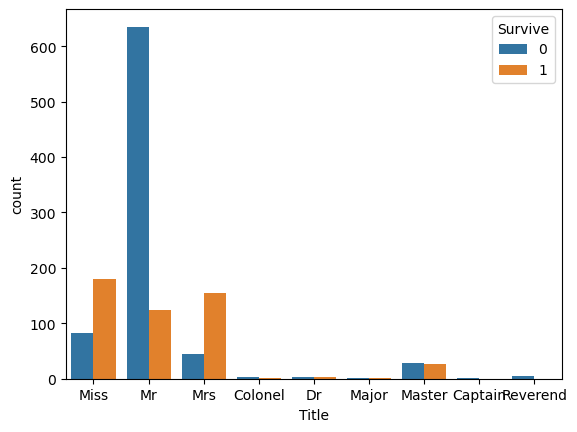

In [60]:
sns.countplot(df_data,x="Title",hue="Survive")

Title is very interesting feature. Let's explore more features

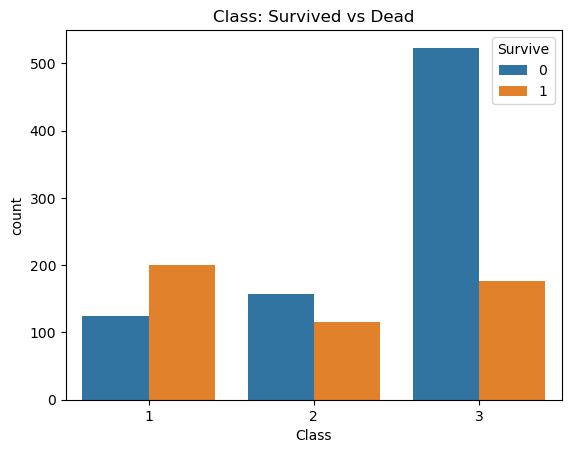

In [61]:
sns.countplot(df_data,x="Class",hue="Survive")
plt.title('Class: Survived vs Dead')
plt.show()

It is usually said that money can't buy everything, But it is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 35% in Class 3 survived. In Class 2, survival and non-survival rate is 40% and 60% approx. While in Class 1 almost 60% people survived. So money and status matters here. So money and status matters here.
Let's dive in again into data to check more interesting observations

In [62]:
pd.crosstab([df_data.Title,df_data.Survive],df_data.Class,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\LKN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


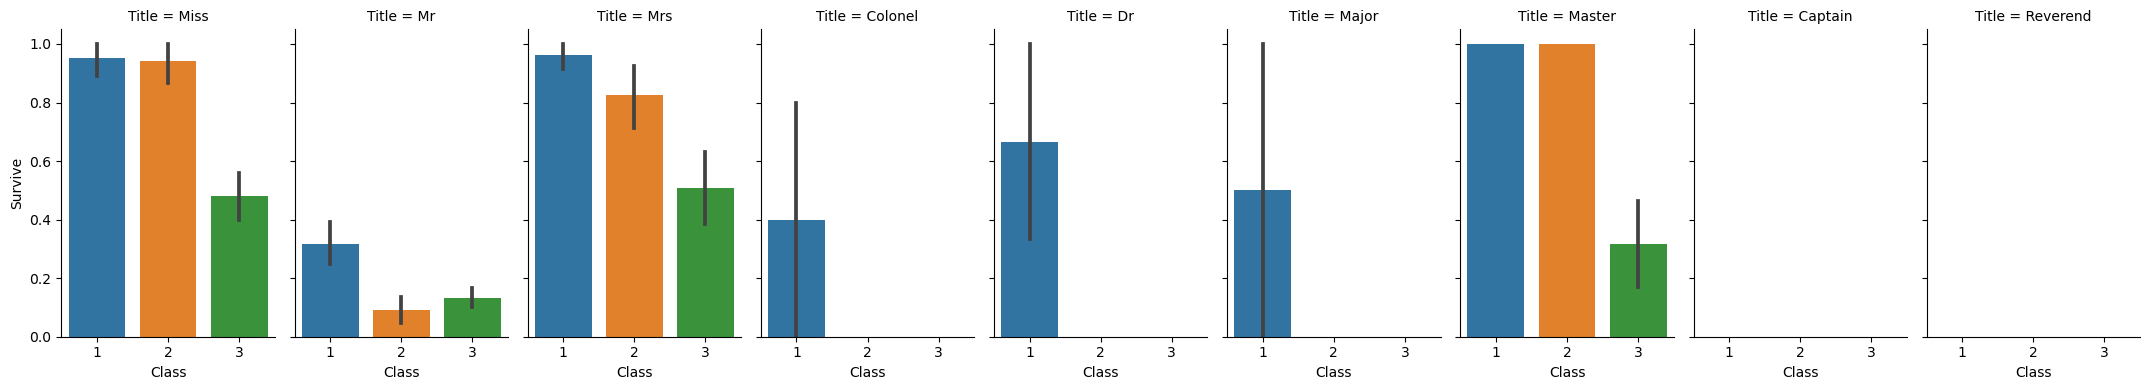

In [63]:
sns.catplot(data=df_data, x="Class", y="Survive", col="Title",
    kind="bar", height=4, aspect=.6,)

Using Crosstab and Caplot, these plots categorical variables can easily be visualized. It is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 63 women died (Miss), and 3 out of 81 (Mrs). Moreover, Colonel, Dr, Major survived are mostly in Class 1, while Master in class 1 and 2 are 100% survived. So, it is now more clear that irrespective of Class, women especialy married women and children are given first priority during Rescue. 
From this conclusion, Class is also a important feature.

In [64]:
print('Oldest person Survived was of:',df_data['Age'].max())
print('Youngest person Survived was of:',df_data['Age'].min())
print('Average person Survived was of:',df_data['Age'].mean())

Oldest person Survived was of: 74
Youngest person Survived was of: 1
Average person Survived was of: 29.64864864864865


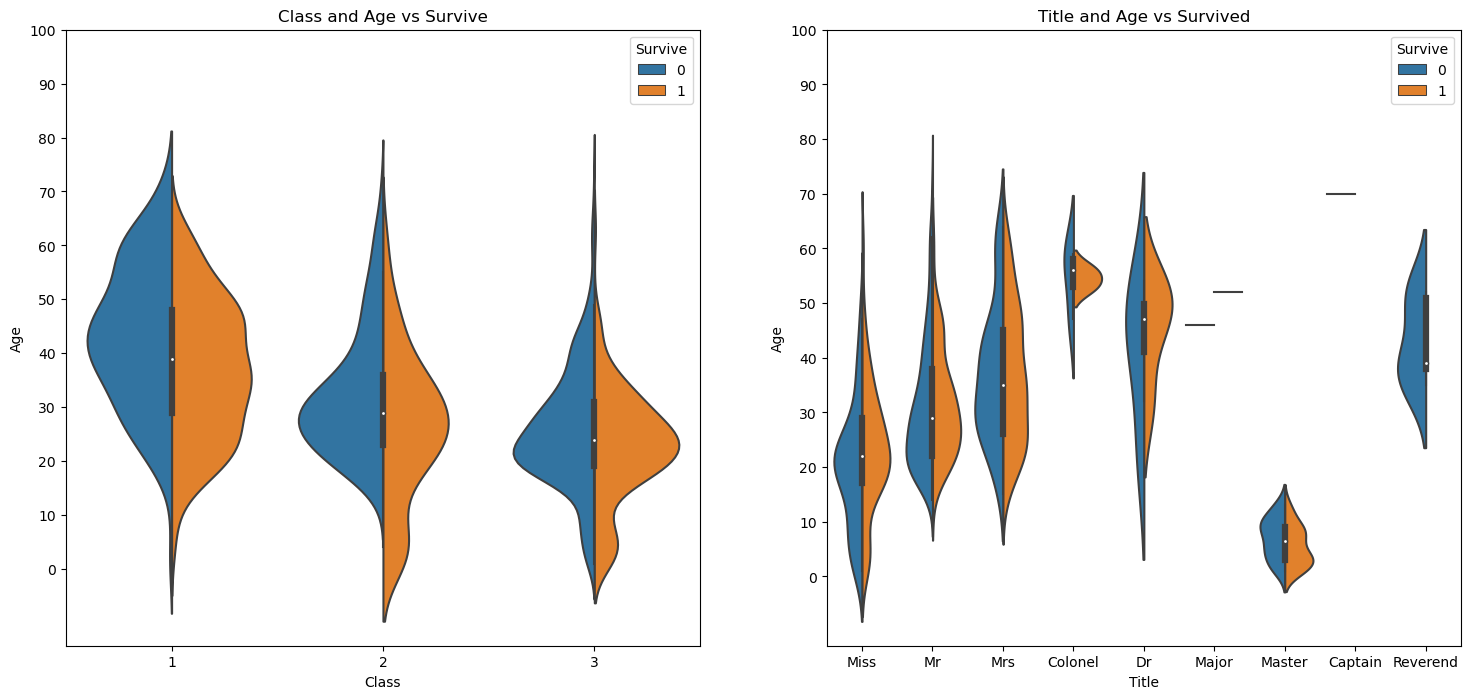

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=df_data, x="Class", y="Age", hue="Survive",split=True,ax=ax[0])
ax[0].set_title('Class and Age vs Survive')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data=df_data, x="Title", y="Age", hue="Survive",split=True,ax=ax[1])
ax[1].set_title('Title and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

From above violen plots, following observations are clear
1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two.
2) Survival rate of children, for age 10 and below is good irrespective of Class 3.

In [66]:
df_data.groupby('Title')['Age'].mean()

Title
Captain     70.000000
Colonel     54.600000
Dr          43.500000
Major       49.000000
Master       6.333333
Miss        22.490494
Mr          31.430830
Mrs         36.757576
Reverend    43.000000
Name: Age, dtype: float64

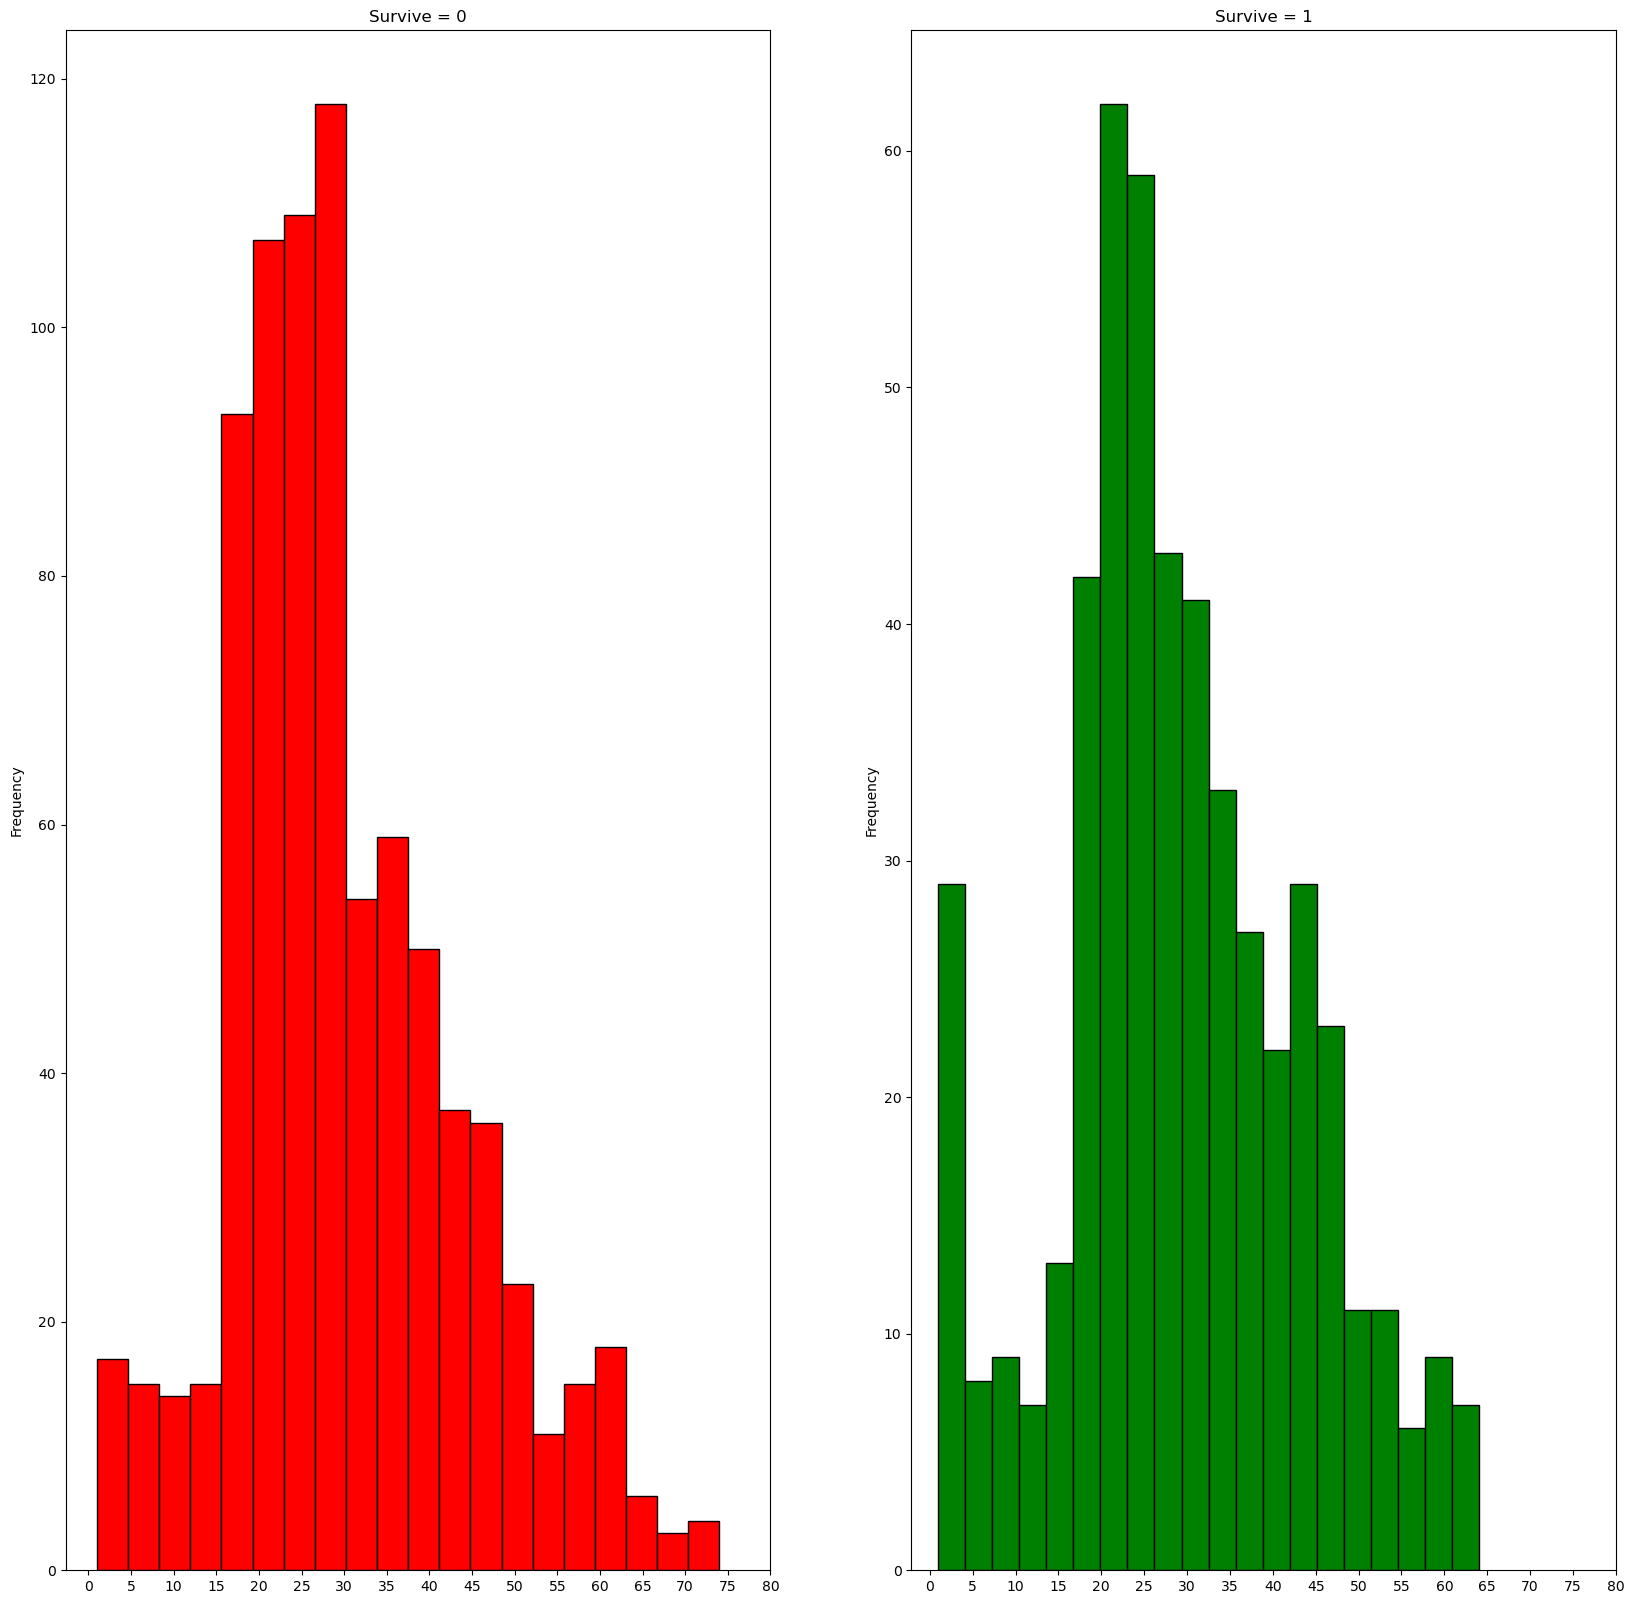

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,20))
df_data[df_data['Survive']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survive = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_data[df_data['Survive']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survive = 1')
plt.show()

From the above plots, we have
1) First priority during Rescue is given to children and women, as the persons<5 are save by large numbers
2) Most death were between 23-30
We have found many intersting infomation about Age feature. Let's take a look at FamilySize feature

In [70]:
pd.crosstab([df_data.FamilySize],df_data.Survive).style.background_gradient('summer_r')

Survive,0,1
FamilySize,,
1,438,192
2,142,124
3,77,97
4,48,36
5,29,16
6,26,10
7,3,11
8,12,4
9,9,0


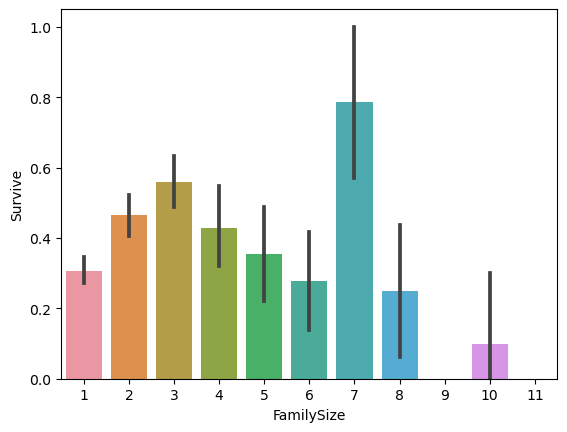

In [71]:
sns.barplot(data=df_data,x="FamilySize",y="Survive")

plt.show()

In [72]:
pd.crosstab(df_data.FamilySize,df_data.Class).style.background_gradient('summer_r')

Class,1,2,3
FamilySize,,,
1,118,150,362
2,84,58,124
3,48,48,78
4,28,16,40
5,20,0,25
6,12,0,24
7,14,0,0
8,0,0,16
9,0,0,9


There are many interesting facts with this feature. Barplot shows that if a passanger is alone in ship with no siblings, survival rate is 30%. The survival rate continue increasing to families with 3 member. Then the rate descreasing, the families with 7 members has high survival rate because 100% 7 members families is in class 1, for families > 8, especialy 9 and 11 members is 0%. Is this because of Class? Yes this is Class, The crosstab shows that Family with size >7 were all in Class 3. It is imminent that mostly the large families in Class3(>7) died.

## 5. Data modeling

Let's import some important libraries in order to use the Machine Learning models.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Let's define the models we use to solve this problem. In this problem we are going to predict **'1'** or **'0'** variables, which is a binary problem. In other words, **'0'** and **'1'** are discrete values, problems that make us predict the outcome of binary event or discrete variables or categorial labels, we must use **Classification Machine Learning Algorithms** (Classifier models, Classifier functions). So in this problem we are going to use 3 basic **Classifier models**, which is **Random Forest**, **Decision Tree**, and **Bagging**, in order to compare the accuracy between them. Let's define the models.

In [43]:
params_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params_grid_bag = {
    'base_estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=10)],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

model_rf = RandomForestClassifier()
model_dt = DecisionTreeClassifier()
model_bag = BaggingClassifier()

models = [(model_rf, params_grid_rf), (model_dt, params_grid_dt), (model_bag, params_grid_bag)]
best_models = []

# for visualization
Models_Name = []
Models_Acc = []

Let's train our models on the training set.

In [44]:
for model, params in models:
    model.fit(X_train, y_train)

C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now let's fine-tune our model on the validating set in order to get the best hyper-parameters.

In [45]:
# to store the best models
best_models = []
for model, params in models:
    grid_search = GridSearchCV(model, params, cv = 5, scoring = 'accuracy')
    grid_search.fit(X_val, y_val)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

Now we have the models with best hyper-parameters, now let's train them again on the training + validating set.

In [47]:
final_models = []
for model in best_models:
    model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
    final_models.append(model)

C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Now let's compare our models based on their accuracy in order to get the best models.

In [48]:
for model in final_models:
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    Models_Name.append(model.__class__.__name__)
    Models_Acc.append(accuracy)

Models_info = pd.DataFrame({
    'Model Name': Models_Name,
    'Model Accuracy': Models_Acc
})
Models_info.head()

C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\LKN\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


,Model Name,Model Accuracy
0,RandomForestClassifier,1.000000
1,DecisionTreeClassifier,0.994872
2,BaggingClassifier,0.958974


Let's visualize it!

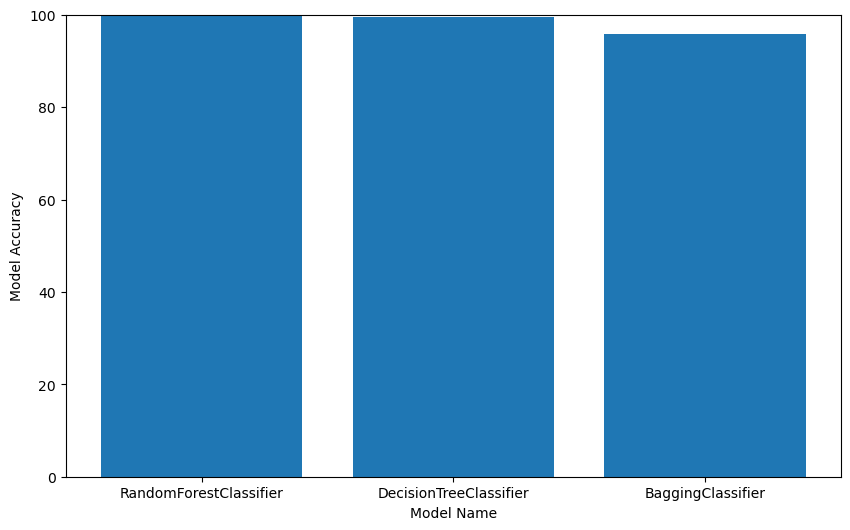

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(Models_info['Model Name'], Models_info['Model Accuracy']*100.0)
plt.ylim(0, 100)
plt.xlabel('Model Name')
plt.ylabel('Model Accuracy')
plt.show()

As we can see that the **'RandomForestClassifier'** have the highest accuracy with 100% accuracy.